<a href="https://colab.research.google.com/github/Antonyraj007/Antony-/blob/main/fraudulent_transactions_for_a_financial_company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('Fraud.csv')




In [3]:
data.shape

(1048575, 11)

In [4]:
data.head(100)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
95,1,TRANSFER,710544.77,C835773569,0.0,0.00,C1359044626,738531.50,16518.36,0,0
96,1,TRANSFER,581294.26,C843299092,0.0,0.00,C1590550415,5195482.15,19200000.00,0,0
97,1,TRANSFER,11996.58,C605982374,0.0,0.00,C1225616405,40255.00,0.00,0,0
98,1,PAYMENT,2875.10,C1412322831,15443.0,12567.90,M1651262695,0.00,0.00,0,0


In [5]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [7]:
data.isnull().sum()#check the null value of the data set

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
data['isFraud'].value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

In [9]:
data['isFlaggedFraud'].value_counts()

0    1048575
Name: isFlaggedFraud, dtype: int64

In [10]:
#nameOrig ,nameDest there is no use for prediction so we drop the two columns
data=data.drop(['nameOrig','nameDest'],axis=1)

In [61]:
data.head()


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [62]:
data['isFlaggedFraud'].value_counts()

0    1048575
Name: isFlaggedFraud, dtype: int64

In [12]:
data['type'].value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

In [13]:
#Exploratory Data Analysis
# we find what type transactions fraudulent follow 

print('\n The types of fraudulent transaction are {}'.format(list(data.loc[data.isFraud == 1].type.drop_duplicates().values)))

dataFraudTransfer = data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')]

dataFraudCashout = data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')]

print('\n The number of fraudulent TRANSFERs = {}'.format(len(dataFraudTransfer)))

print('\n The number of fraudulent CASH_OUTs = {}'.format(len(dataFraudCashout)))



 The types of fraudulent transaction are ['TRANSFER', 'CASH_OUT']

 The number of fraudulent TRANSFERs = 564

 The number of fraudulent CASH_OUTs = 578


In [15]:
#Exploratory Data Analysis
# we find what type transactions fraudulent follow 

print('\n The types of fraudulent transaction are {}'.format(list(data.loc[data.isFraud == 1].type.drop_duplicates().values)))

dataFraudTransfer = data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')]

dataFraudCashout = data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')]

print('\n The number of fraudulent TRANSFERs = {}'.format(len(dataFraudTransfer)))

print('\n The number of fraudulent CASH_OUTs = {}'.format(len(dataFraudCashout)))



 The types of fraudulent transaction are ['TRANSFER', 'CASH_OUT']

 The number of fraudulent TRANSFERs = 564

 The number of fraudulent CASH_OUTs = 578


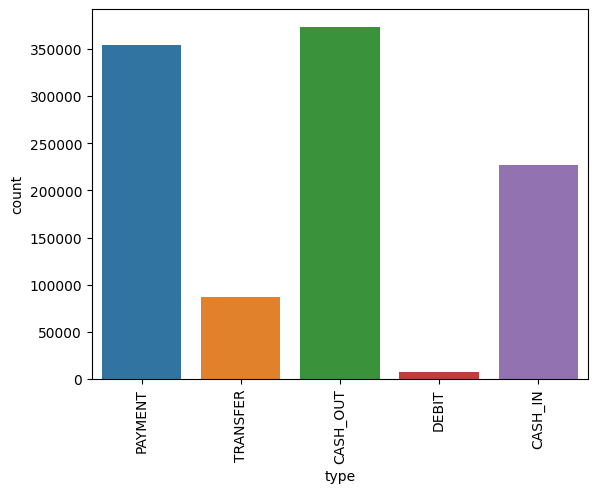

In [17]:

import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=data['type'])
plt.xticks(rotation=90)
plt.show()


In [18]:
from sklearn import preprocessing

label_encoder=preprocessing.LabelEncoder()
data['type']=label_encoder.fit_transform(data['type'])

In [19]:
X,y=data.loc[:,data.columns !='isFraud'],data['isFraud']

In [20]:
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,3,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,3,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,4,181.00,181.00,0.00,0.00,0.00,0
3,1,1,181.00,181.00,0.00,21182.00,0.00,0
4,1,3,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...
1048570,95,1,132557.35,479803.00,347245.65,484329.37,616886.72,0
1048571,95,3,9917.36,90545.00,80627.64,0.00,0.00,0
1048572,95,3,14140.05,20545.00,6404.95,0.00,0.00,0
1048573,95,3,10020.05,90605.00,80584.95,0.00,0.00,0


In [21]:
y

0          0
1          0
2          1
3          1
4          0
          ..
1048570    0
1048571    0
1048572    0
1048573    0
1048574    0
Name: isFraud, Length: 1048575, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=56)


In [23]:

X_train.shape

(734002, 8)

In [24]:
y_train.shape

(734002,)

In [25]:
X_test.shape

(314573, 8)

In [26]:
y_test.shape

(314573,)

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [28]:

from sklearn.linear_model import LogisticRegression 
log_regression=LogisticRegression()
log_regression.fit(X_train,y_train)

y_pred_log=log_regression.predict(X_test)
train_score=log_regression.score(X_train,y_train)
test_score=log_regression.score(X_test,y_test)



In [29]:
from sklearn.model_selection import cross_val_score

cross_val_log_score=cross_val_score(log_regression,X_train,y_train,cv=10).mean()

print('cross_val_score',cross_val_log_score.mean())

cross_val_score 0.9991961874577434


In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314234
           1       0.88      0.24      0.38       339

    accuracy                           1.00    314573
   macro avg       0.94      0.62      0.69    314573
weighted avg       1.00      1.00      1.00    314573



In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [33]:
precision_score(y_test,y_pred_log,average='weighted')

0.9990607243095058

In [34]:
recall_score(y_test,y_pred_log,average='weighted')

0.9991512303980317

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [36]:
from sklearn.tree import DecisionTreeClassifier
cross_val_tree=[]
train_tree=[]
test_score_tree=[]
max_depth=np.arange(1,5)
for d in max_depth:
  dt=DecisionTreeClassifier(max_depth=d,random_state=10,)
  dt.fit(X_train,y_train)
  print('depth_value is',d,'train_score_dt is',dt.score(X_train,y_train),'cross_val_score_dt is',cross_val_score(dt,X_train,y_train).mean())
  train_tree.append(dt.score(X_train,y_train))
  test_score_tree.append(dt.score(X_test,y_test))
  cross_val_tree.append(cross_val_score(dt,X_train,y_train).mean())




depth_value is 1 train_score_dt is 0.998986378783709 cross_val_score_dt is 0.9989863787595683
depth_value is 2 train_score_dt is 0.9990013651188961 cross_val_score_dt is 0.9990000027006476
depth_value is 3 train_score_dt is 0.99947002869202 cross_val_score_dt is 0.9994686663071866
depth_value is 4 train_score_dt is 0.9994836526330991 cross_val_score_dt is 0.999475478287007


In [37]:
y_pred_dt=dt.predict(X_test)

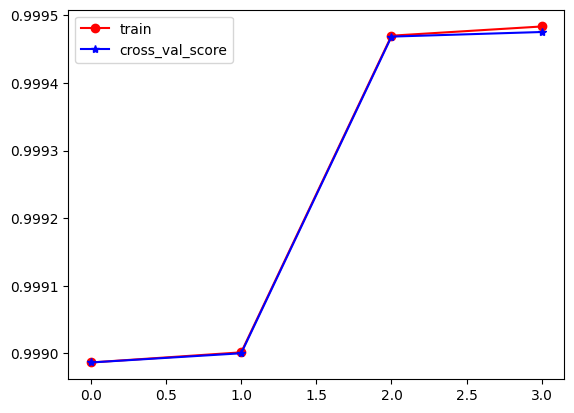

In [38]:
plt.plot(train_tree,'ro-',label='train')
plt.plot(cross_val_tree,'b*-',label='cross_val_score')
plt.legend()

In [39]:
#finding the best depth_value is 3 after 3 cross_val_score was increasing very slightly so we choose depth value as 11
dt=DecisionTreeClassifier(max_depth=3,random_state=10,)
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)
dt_final_cross_val_score=cross_val_score(dt,X_train,y_train).mean()
print('depth_value is',3,'train_score_dt is',dt.score(X_train,y_train),'cross_val_score_dt is',cross_val_score(dt,X_train,y_train).mean())


depth_value is 3 train_score_dt is 0.99947002869202 cross_val_score_dt is 0.9994686663071866


In [40]:
#Random forest Classifier
from  sklearn.ensemble import RandomForestClassifier

max_depth=np.arange(1,5)
rfc_train_score=[]
rfc_test_score=[]
rfc_cross_val_score=[]
for d in max_depth:
  rfc=RandomForestClassifier(max_depth=d,random_state=10)
  rfc.fit(X_train,y_train)
  print('depth_value is',d,'train_score',rfc.score(X_train,y_train),'cross_val_score_rfc is',cross_val_score(rfc,X_train,y_train).mean())
  rfc_train_score.append(rfc.score(X_train,y_train))
  rfc_test_score.append(rfc.score(X_test,y_test))
  rfc_cross_val_score.append(cross_val_score(rfc,X_train,y_train).mean())


depth_value is 1 train_score 0.9989059975313419 cross_val_score_rfc is 0.9989059975387541
depth_value is 2 train_score 0.9989059975313419 cross_val_score_rfc is 0.9989059975387541
depth_value is 3 train_score 0.9990068146953278 cross_val_score_rfc is 0.9990027275334101
depth_value is 4 train_score 0.9992111738115155 cross_val_score_rfc is 0.9992002745955354


In [41]:
y_pred_rfc=rfc.predict(X_test)

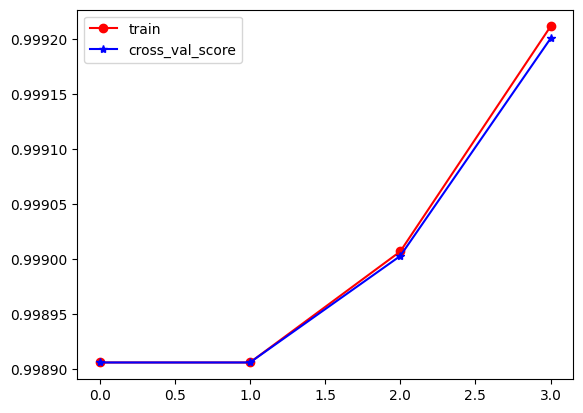

In [42]:
plt.plot(rfc_train_score,'ro-',label='train')
plt.plot(rfc_cross_val_score,'b*-',label='cross_val_score')
plt.legend()

In [43]:
#accuracy,f1_score,Au-Roc
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score
#confusion_matrix:
conf_log=confusion_matrix(y_test,y_pred_log)
conf_dtc=confusion_matrix(y_test,y_pred_dt)
conf_rfc=confusion_matrix(y_test,y_pred_rfc)


print('confusion_matrix for logistic regreesion is',conf_log)
print('confusion_matrix for decisiontree is',conf_dtc)
print('confusion_matrix for random_forest is',conf_rfc)



print('accuracy for logistic_regression is',accuracy_score(y_test,y_pred_log))
print('accuracy for decision_tree is',accuracy_score(y_test,y_pred_dt))
print('accuracy for randomforest is',accuracy_score(y_test,y_pred_rfc))


print('AU-Roc for logistic_regression is',roc_auc_score(y_test,log_regression.predict_proba(X_test)[:,1]))
print('AU-Roc for DecisionTree is',roc_auc_score(y_test,dt.predict_proba(X_test)[:,1]))
print('AU-Roc for RandomForest is',roc_auc_score(y_test,rfc.predict_proba(X_test)[:,1]))





confusion_matrix for logistic regreesion is [[314223     11]
 [   256     83]]
confusion_matrix for decisiontree is [[314234      0]
 [   193    146]]
confusion_matrix for random_forest is [[314234      0]
 [   267     72]]
accuracy for logistic_regression is 0.9991512303980317
accuracy for decision_tree is 0.9993864699131839
accuracy for randomforest is 0.9991512303980317
AU-Roc for logistic_regression is 0.8796949187463646
AU-Roc for DecisionTree is 0.7326551528225317
AU-Roc for RandomForest is 0.98053279367575


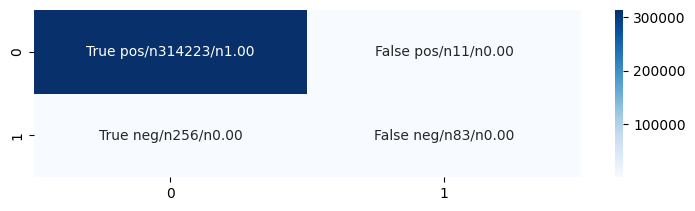

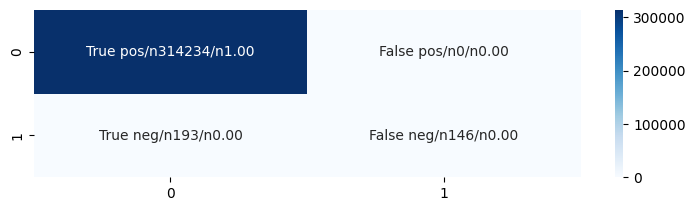

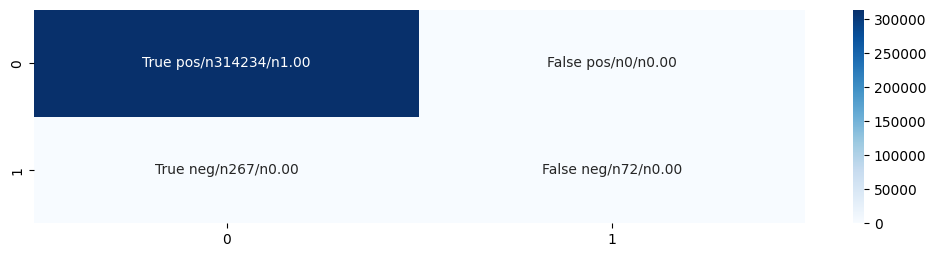

In [44]:
i=431
for cm in [conf_log,conf_dtc,conf_rfc]:
  group_name=["True pos",'False pos','True neg','False neg']
  group_counts=["{0:0.0f}".format(value)for value in cm.flatten()]
  group_per=["{0:.2f}".format(i)for i in cm.flatten()/np.sum(cm)]
  labels=[f'{v1}/n{v2}/n{v3}'for v1,v2,v3 in zip (group_name,group_counts,group_per)]
  labels=np.asarray(labels).reshape(2,2)
  plt.figure(figsize=(30,10))
  plt.subplot(i)
  sns.heatmap(cm,annot=labels,fmt="",cmap="Blues")
  i=i+1

plt.tight_layout()

In [45]:
print(dt.feature_importances_)

[0.82947053 0.         0.14757407 0.02295539 0.         0.
 0.         0.        ]


In [46]:
importances=dt.feature_importances_

In [47]:
#feature_importance
df1=pd.DataFrame({'feature_names':X.columns,'importances':dt.feature_importances_})
df1

,feature_names,importances
0,step,0.829471
1,type,0.000000
2,amount,0.147574
3,oldbalanceOrg,0.022955
4,newbalanceOrig,0.000000
5,oldbalanceDest,0.000000
6,newbalanceDest,0.000000
7,isFlaggedFraud,0.000000


In [48]:
df1.sort_values(by='importances',ascending=False)


,feature_names,importances
0,step,0.829471
2,amount,0.147574
3,oldbalanceOrg,0.022955
1,type,0.000000
4,newbalanceOrig,0.000000
5,oldbalanceDest,0.000000
6,newbalanceDest,0.000000
7,isFlaggedFraud,0.000000


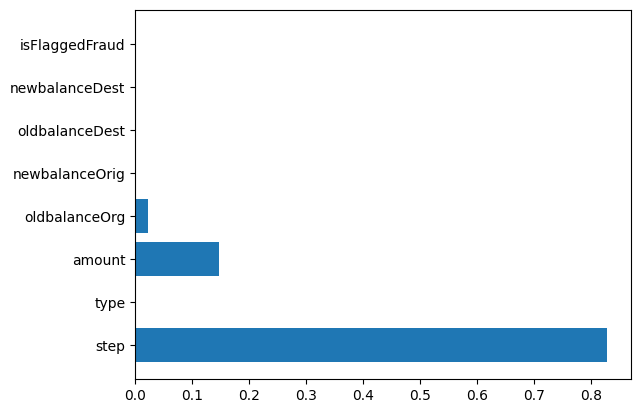

In [49]:
plt.barh(df1['feature_names'],df1['importances'],align='center')
plt.xticks()
plt.show()

Text(0.5, 1.0, 'step vs fraud')

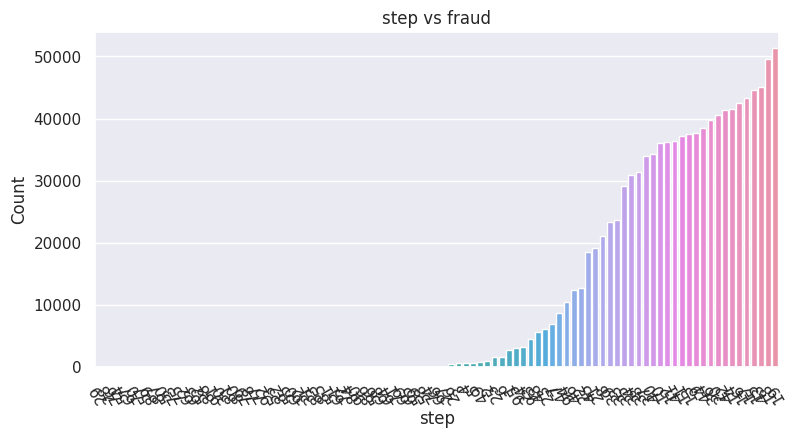

In [70]:
sns.set_theme(style='darkgrid',palette='pastel')

plt.figure(figsize=(30,20))
plt.subplot(431)
sns.countplot(x=data['step'],order=data['step'].value_counts().index[::-1])
plt.xticks(rotation=120)
plt.xlabel('step')
plt.ylabel('Count')
plt.title('step vs fraud')

